# Timeline 

Source: https://spice-spotlight.scot/2021/03/05/timeline-of-coronavirus-covid-19-in-scotland/
* 31 December 2019 - Chinese authorities alert WHO
* 23rd March - people only allowed to go outside to buy food, exercise once a day, or go to work if can't from home
* 24th March - First day of lockdown 
* 29th May - Move to phase 1
* 11th May - people can go outside more than once a day to exercise (household only)
* 19th June - phase 2
* 29th June - Highstreet retail open, safe return Uni announced 
* 3rd July - 5 mile rule travel distance relaxed 
* 6th July - Outdoor hospitality opens 
* 8 July - can meet with two different households up to 8 people 
* 10 July - move to phase 3 (in doors up to 8 people, overnight allowed) 
* 13 July - dentists, shopping centers allowed to open
* 15 July - pubs, resteraunts, holiday accomadtion allowed to open 
* 16 July - no physical distancing allowed between primary and secondary school 
* 20 July - oxford show paper that vaccine working (confidence in public increases?)
* 11 August - Schools reopen
* 20 August - Scotlant remains in Stage 3
* 27 August - Police granted power to stop household parties 
* 10 Septemeber - limiiting indoor and outdoor gatherings to 6 people 
* 21 September - University of Edinburgh starts
* 22 Sep - national curfew for pubs and restaurants 
* 7 October - hospitality restriced to 6am to 6pm no sale alcohol indoors, premises may open outdoors until 10pm, with sales of alcohol. All licensed premises in the central belt area will be required to close, with the exception of takeaway services. Outdoor live events, adult contact sports and indoor group exercise classes (18+) are to be paused
* 9 November - '90% protection' vaccine announced 
* 17 November - Edinburgh remains level 3
* 8 december - Plans to start vaccinations 
* 30 December - Scottish Government urge the public to stay home during Hogmanay to suppress COVID-19.
* 5 January - Scottish Government announce mainland Scotland is to go into lockdown from 5 January 2021 with a new legal requirement forbidding anyone from leaving their home except for essential purposes. Suspension of all travel corridors
* 16 January - Lockdown restrictions strengthened
* 5 Feburary - mandatory hotel quarantine announced for 15 Feb when traveling from banned countries 
* 2 march - announcement for primary school children to return to school

# Key things to look for
* We can assume dates before 2020 are valid as a comparison for pre-COVID days. 
* Is there a sudden drop in activity at the initial lockdown?
* What about transition phase; did people begin to get cautious with all the talk before official lockdown?
* Is there a clear point where public confidence grows and they stop caring about the restrictions?
* We'd expect biking activity to increase mid July due to a lot of lifted restrictions, does data reflect this? 
* What is night time activity on bikes like before and after the early closing of restaurants and pubs?
* Does bike activity increase when people are allowed to go and exercise?
* People are forbidden to leave hom from 5th January -- does data reflect this? 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if False:
    # download the datasets
    URL = 'https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/{}/{:02d}.json'
    months_2019 = [pd.read_json(URL.format('2019', month)) for month in range(1, 13)]
    months_2020 = [pd.read_json(URL.format('2020', month)) for month in range(1, 13)]
    pd.concat(months_2019, ignore_index=True).to_pickle('datasets/trips_2019.pkl')
    pd.concat(months_2020, ignore_index=True).to_pickle('datasets/trips_2020.pkl')
    
trips_2019 = pd.read_pickle('datasets/trips_2019.pkl')
trips_2020 = pd.read_pickle('datasets/trips_2020.pkl')

In [3]:
trips_2019

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-01-01 05:58:47.853000+00:00,2019-01-01 07:16:14.003000+00:00,4646,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
1,2019-01-01 06:02:13.573000+00:00,2019-01-01 07:21:17.799000+00:00,4744,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
2,2019-01-01 06:14:09.702000+00:00,2019-01-01 07:21:57.806000+00:00,4068,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
3,2019-01-01 06:25:08.003000+00:00,2019-01-01 06:36:22.831000+00:00,674,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,284,Leith Links,Corner of Vanburgh Place and Lochend Road,55.969199,-3.166885
4,2019-01-01 06:54:31.775000+00:00,2019-01-01 06:59:52.605000+00:00,320,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,261,Brunswick Place,Junction Brunswick Street and Elm Row,55.960930,-3.181005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121105,2019-12-30 22:46:51.119000+00:00,2019-12-30 23:07:29.113000+00:00,1237,1098,Marchmont Crescent,Corner of Marchmont Road,55.936432,-3.194150,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527
121106,2019-12-30 22:58:21.713000+00:00,2019-12-30 23:14:11.583000+00:00,949,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986
121107,2019-12-30 23:35:33.033000+00:00,2019-12-30 23:45:05.715000+00:00,572,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847
121108,2019-12-30 23:41:48.318000+00:00,2019-12-30 23:51:45.413000+00:00,597,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589


In [4]:
trips_2020

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-01-01 00:11:49.789000+00:00,2020-01-01 00:32:37.402000+00:00,1247,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847,1725,Edinburgh Zoo,"Corstorphine Road, Edinburgh",55.942115,-3.269287
1,2020-01-01 00:15:47.185000+00:00,2020-01-01 00:24:48.541000+00:00,541,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739
2,2020-01-01 00:21:32.841000+00:00,2020-01-01 01:02:45.899000+00:00,2473,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,259,St Andrew Square,North East corner,55.954906,-3.192444
3,2020-01-01 00:24:10.267000+00:00,2020-01-01 01:02:52.413000+00:00,2322,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,259,St Andrew Square,North East corner,55.954906,-3.192444
4,2020-01-01 00:46:13.134000+00:00,2020-01-01 01:01:06.431000+00:00,893,1756,Western General Hospital,Porterfield Road,55.963454,-3.232909,1095,Dudley Gardens,Opposite Victoria Park on Newhaven Road,55.975940,-3.191321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226542,2020-12-30 22:03:58.774000+00:00,2020-12-30 23:12:02.346000+00:00,4083,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765
226543,2020-12-30 22:04:54.594000+00:00,2020-12-30 23:12:17.881000+00:00,4043,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765
226544,2020-12-30 22:13:20.540000+00:00,2020-12-30 23:10:14.763000+00:00,3414,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307
226545,2020-12-30 22:14:33.529000+00:00,2020-12-30 23:10:22.243000+00:00,3348,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307


Note: this is all just for exploring and of course not how we will finally present (or even use)

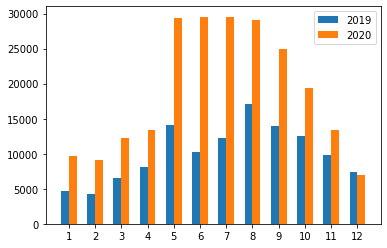

In [67]:
# number of trips 
x = np.arange(12)
width = 0.3
months = range(1, 13)
ax = plt.subplot()
ax.bar(x - width/2, [len(trips_2019[trips_2019.started_at.dt.month == x]) for x in months],
       width=width, label='2019')
ax.bar(x + width/2, [len(trips_2020[trips_2020.started_at.dt.month == x]) for x in months],
       width=width, label='2020')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()
# On the 11th of may people are allowed to go outside to exercise and we see an almost double increase in bike usage

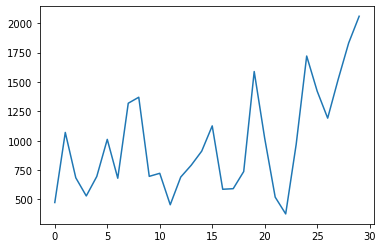

In [68]:
# does number of trips in May correspond to announcement?
may_covid = trips_2020[trips_2020.started_at.dt.month == 5]
trips_per_day = [len(may_covid[may_covid.started_at.dt.day == x]) for x in range(1, 31)]
plt.plot(trips_per_day)
# not really lol
# bike usage tends to go down on weekends, would imply people mainly use them for commute and not pleasure